## 引入：mean estimation

该算法的目的是通过“采样”估计expectation

$w_{k+1}^{} = \frac{1}{k} \sum_{i=1}^{k} x_{i} , \ \ \ \  k=1,2,...$

$w_{k+1}$ ：下标是k+1，但这个是前k个元素的均值

这个是定义式，已知一系列随机变量$X$的采样，求**mean estimation**，估计其expectation

#### 一、定义式：直接求平均

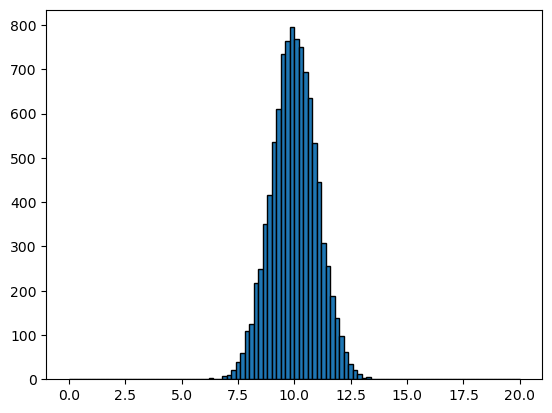

In [165]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3-5
x = np.random.normal(10, 1, 10000) # 均值，方差，个数

plt.hist(x, bins=100, range=(0, 20), edgecolor='black')
plt.show()

In [166]:
f(x).mean() #直接求平均

1023.0854197318524

#### 二、迭代式
$w_{k+1}^{} = \frac{1}{k} \sum_{i=1}^{k} x_{i} ,\ \ \ \  k=1,2,...$

$w_{k}^{} = \frac{1}{k-1} \sum_{i=1}^{k-1} x_{i} ,\ \ \ \  k=2,3,...$

$w_{k+1}^{} = \frac{1}{k} \sum_{i=1}^{k} = \frac{1}{k}(\sum_{i=1}^{k-1} x_{i} +  x_{k})=\frac{1}{k}((k-1)w_{k} + x_{k})=w_{k} - \frac{1}{k}(w_{k}-x_{k})$

$w_{1}= 0$

$w_{2}= \frac{1}{1} * f(x1) =  0 - \frac{1}{1}(0 - f(x_{1})) = w_{1} - \frac{1}{1}(w_{1} - f(x_{1}))$

$w_{3}= \frac{1}{2} * [f(x1)+f(x2)] = w_{2} - \frac{1}{2}(w_{2} - f(x_{2}))$

In [167]:
w = 0  #w1
for i in range(0,10000):
    w = w - 1/(i+1)*(w-f(x[i]))
    # print(w)
print(w)

1023.0854197318486


In [168]:
w = 0  #w1
for i in range(0,10000):
    w = w - 1/(i+20)*(w-f(x[i]))  #实际上i+什么常数最终都能收敛
    # print(w)
print(w)

1021.1452437686982


## Robbins-Monro

下面是三个RM算法的例子

$w_{k+1} = w_{k} - a_{k}\widetilde{g} (w_{k},\eta_{k}),\ \ \ \ k=1,2,3...$

$f(x) = x - 10$

In [172]:
f = lambda x: x-10   #f(x) = x-10

w = 0
a = 0.5
tmp = []
for i in range(65535):
    w = w - a * f(w)
    tmp.append(w)
print(w)
print(tmp[:20])

10.0
[5.0, 7.5, 8.75, 9.375, 9.6875, 9.84375, 9.921875, 9.9609375, 9.98046875, 9.990234375, 9.9951171875, 9.99755859375, 9.998779296875, 9.9993896484375, 9.99969482421875, 9.999847412109375, 9.999923706054688, 9.999961853027344, 9.999980926513672, 9.999990463256836]


$f(x) = x^{3} - 5$

In [196]:
f = lambda x: x**3-5   #f(x) = x^3-5

w = 2   # 注意，这里方程的梯度是二次方，无上界，所以对初始取值很苛刻，不然极其容易无法收敛
tmp = []
for i in range(65535):
    w = w - 1/(i+1) * f(w)  #
    tmp.append(w)
print(w)
print(tmp[:20])

1.709975946676698
[-1.0, 2.0, 1.0, 2.0, 1.4, 1.776, 1.6900262034285713, 1.7116470131387955, 1.7100166782797486, 1.7099809474497056, 1.7099769595246843, 1.7099762191278756, 1.7099760352850588, 1.7099759797652512, 1.709975960414947, 1.7099759528829057, 1.7099759496804825, 1.7099759482166288, 1.7099759475056624, 1.709975947142076]


$f(x) = \tan^{-1}(x-1)$

In [192]:
import math
f = lambda x: math.atan(x-1)   #f(x) = atan(x-1)

w = 3
tmp = []
for i in range(65535):
    w = w - 1/(i+1) * f(w)  #
    tmp.append(w)
print(w)
print(tmp[:20])

1.0000172827803324
[1.8928512822059096, 1.5284255494848975, 1.3663826816047848, 1.2785840712557495, 1.2242450251245602, 1.1874790700725582, 1.1610036799555115, 1.1410494629847525, 1.1254800094579749, 1.1129972503291203, 1.1027681620635261, 1.0942341079647881, 1.0870066733715102, 1.080807522391481, 1.0754320343147261, 1.070726443592413, 1.066572980868577, 1.0628799313165236, 1.0595748126843663, 1.0565995885721189]


### RM算法收敛的三大条件

1、方程的**梯度**有上下界

2、折扣因子a，减少的不能太快也不能太慢，收敛性介于调和级数和二次方的p级数之间

3、噪声的期望得是0，并且方差是有界的（这个很显然，如果噪声期望不是0，那就一定有误差）

### mean estimate算法是RM算法的证明：

考虑方程：$g(w) = w - E[x]$

显然若能解出 $g(w^{*}) = 0$ 那么相当于解得 $w^{*} = E[x]$

$\widetilde{g} (w,\eta) = w - x= w-x+E[x]-E[x] = (w-E[x])+(E[x]-x) = g(w)+ \eta $

即：$g(w) = w-E[x]$  误差$\eta = E[x]-x$

显然误差的期望和方差是符合条件的， 然后梯度是常数，折扣因子是$1/k$ 三个条件都满足